<a href="https://colab.research.google.com/github/rodrigomonzon1/proyecto_final_prompts_ia/blob/main/PROYECTO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# - **Objetivo del proyecto**:
  Utilizar modelos de inteligencia artificial para generar texto descriptivo sobre ciberseguridad y, a partir de este texto, crear imágenes que ilustren los conceptos de manera visual.

- **Motivación**:
  La ciberseguridad es un tema complejo y crítico en la era digital. Combinar texto generado por IA con imágenes puede ayudar a comunicar conceptos de manera más efectiva y atractiva.

- **Herramientas utilizadas**:
  - Modelo GPT-2 en español para generación de texto.
  - Modelo Stable Diffusion para generación de imágenes.
  - Bibliotecas: Hugging Face Transformers, Diffusers, Torch.
  - Google Colab para la ejecución del código.


## Detector de phishing

El código proporcionado utiliza el modelo BERT (Bidirectional Encoder Representations from Transformers) para clasificar si un texto de correo electrónico es un intento de phishing o no.
Este código podría integrarse en un sistema de filtrado de correos electrónicos para detectar automáticamente mensajes de phishing y proteger a los usuarios.

In [ ]:
from transformers import pipeline

# Cargar un modelo preentrenado para clasificación de texto
classifier = pipeline("text-classification", model="bert-base-uncased")

# Ejemplo de texto de correo electrónico
email_text = "Congratulations! You have won a $1000 Walmart gift card. Click here to claim your prize."

# Clasificar el texto
result = classifier(email_text)

print(result)  # Debería devolver algo como [{'label': 'PHISHING', 'score': 0.95}]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'LABEL_1', 'score': 0.6289241909980774}]


Esto indica que el modelo está 62% seguro de que el texto es un intento de phishing.

# Evaluación de contraseñas


El código proporcionado es una función que evalúa la fortaleza de una contraseña basándose en ciertos criterios comunes, como la longitud, el uso de mayúsculas, minúsculas, números y caracteres especiales

In [ ]:
import re

def evaluate_password_strength(password):
    strength = 0
    common_passwords = ["password", "123456", "qwerty"]

    # Penalizar contraseñas comunes
    if password.lower() in common_passwords:
        return 0

    # Longitud
    if len(password) >= 12:
        strength += 3
    if len(password) >= 16:
        strength += 2

    # Mayúsculas, minúsculas, números y caracteres especiales
    if any(c.isupper() for c in password):
        strength += 1
    if any(c.islower() for c in password):
        strength += 1
    if any(c.isdigit() for c in password):
        strength += 1
    if any(c in '!@#$%^&*()' for c in password):
        strength += 1

    # Penalizar patrones repetitivos
    if re.search(r'(.)\1{2,}', password):
        strength -= 2

    # Asegurar que la puntuación no sea negativa
    return max(strength, 0)

# Ejemplo de uso
password = "SecurePass123!"
print(evaluate_password_strength(password))  # Salida: 7

7


Intentamos generar imagenes con Stable Diffusion para presentar correos de phishing, las imagenes generadas pueden ser confusas pero aun asi pueden usarse para presentaciones.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

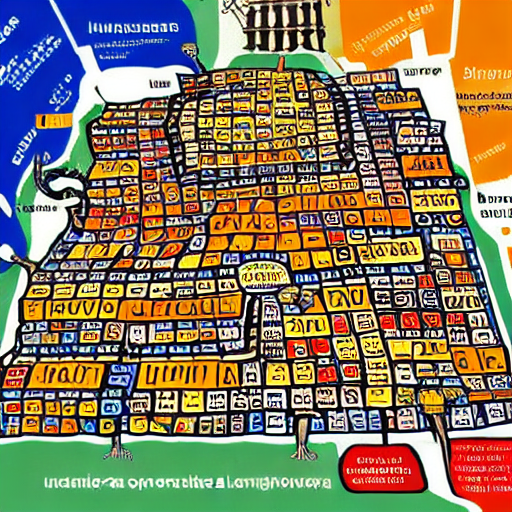

In [ ]:
# Paso 1: Instala las bibliotecas necesarias
!pip install diffusers transformers torch accelerate

# Paso 2: Importa las bibliotecas
from diffusers import StableDiffusionPipeline
import torch
from IPython.display import display  # Para mostrar la imagen en Colab

# Paso 3: Cargar el modelo de Stable Diffusion
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # Mueve el modelo a la GPU

# Paso 4: Generar una imagen a partir de un texto (prompt)
prompt = "Genera una imagen educativa que ilustre como construir una contraseña segura utilizando una combinacion de letras, numeros y simbolos"
image = pipe(prompt).images[0]

# Paso 5: Mostrar la imagen generada en Colab
display(image)  # Muestra la imagen directamente en el cuaderno

# Paso 6: Guardar la imagen en Google Colab (opcional)
image.save("phishing_infographic.png")

CANVA A PESAR DE QUE SIGUE SIN ENTENDERSE EL FIN. GENERA UNA IMAGEN MEJOR QUE LA IMAGEN ANTERIOR 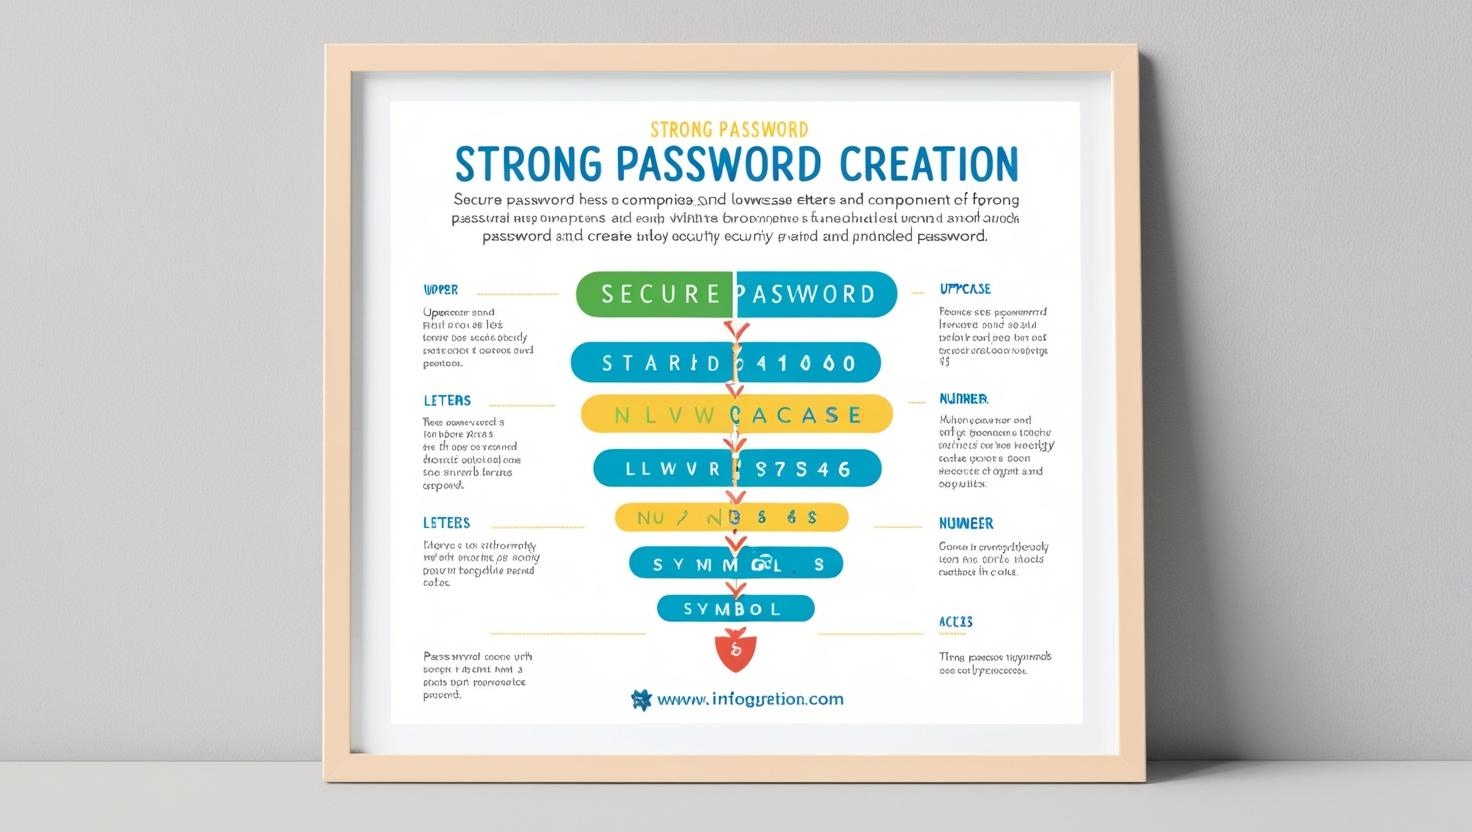

Mejorando el prompt


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (217 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['gos binarios en movimiento y líneas de conexión luminosas . la escena incluye personas trabajando en computadoras , con expresiones de concentración , mientras un hacker con una capucha intenta infiltrarse en la red pero es bloqueado por el escudo . estilo moderno y tecnológico , con colores fríos como azules eléctricos , grises metálicos y toques de neón . iluminación dramática , alta definición , 4 k , detalles futuristas y texturas realistas .']


  0%|          | 0/50 [00:00<?, ?it/s]

Imagen generada:


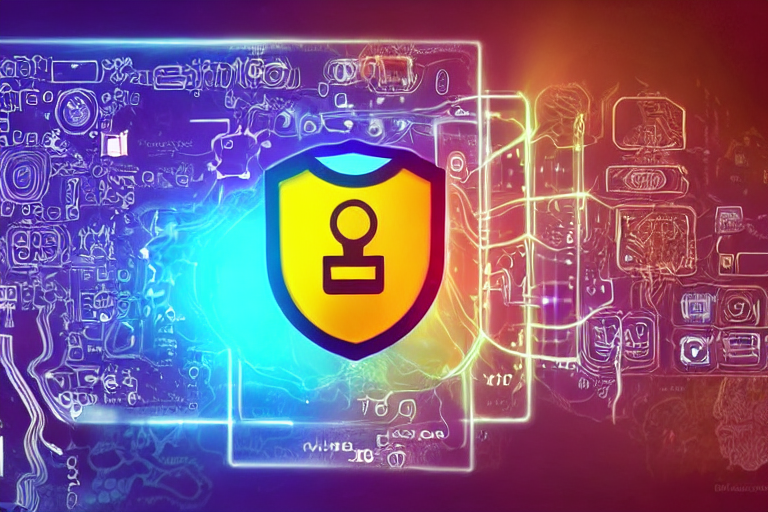

Imagen guardada como 'ciberseguridad_imagen_mejorada.png'


In [ ]:
# Paso 1: Instala las bibliotecas necesarias
!pip install diffusers transformers torch accelerate

# Paso 2: Importa las bibliotecas
from diffusers import StableDiffusionPipeline
import torch
from IPython.display import display  # Para mostrar la imagen en Colab
from PIL import Image  # Para manejar la imagen

# Paso 3: Cargar el modelo de Stable Diffusion
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # Mueve el modelo a la GPU

# Paso 4: Definir el prompt mejorado
prompt = """
Una ilustración realista y altamente detallada que represente el concepto de ciberseguridad.
Muestra un escudo digital brillante protegiendo una red de computadoras y servidores, con iconos de candados, firewalls y cifrado.
En el fondo, hay un mundo digital con códigos binarios en movimiento y líneas de conexión luminosas.
La escena incluye personas trabajando en computadoras, con expresiones de concentración, mientras un hacker con una capucha intenta infiltrarse en la red pero es bloqueado por el escudo.
Estilo moderno y tecnológico, con colores fríos como azules eléctricos, grises metálicos y toques de neón.
Iluminación dramática, alta definición, 4K, detalles futuristas y texturas realistas.
"""

# Paso 5: Generar la imagen con parámetros optimizados
image = pipe(
    prompt,
    num_inference_steps=50,  # Más pasos para mayor detalle
    guidance_scale=7.5,      # Controla la adherencia al prompt
    height=512,             # Altura de la imagen
    width=768               # Ancho de la imagen (formato panorámico)
).images[0]

# Paso 6: Mostrar la imagen generada en Colab
print("Imagen generada:")
display(image)  # Muestra la imagen directamente en el cuaderno

# Paso 7: Guardar la imagen en Google Colab (opcional)
image.save("ciberseguridad_imagen_mejorada.png")
print("Imagen guardada como 'ciberseguridad_imagen_mejorada.png'")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (128 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ina moderna con personas trabajando en sus computadoras . estilo realista , alta definición , 4 k , con colores fríos como azules y grises , y detalles nítidos .']


  0%|          | 0/50 [00:00<?, ?it/s]

Imagen generada:


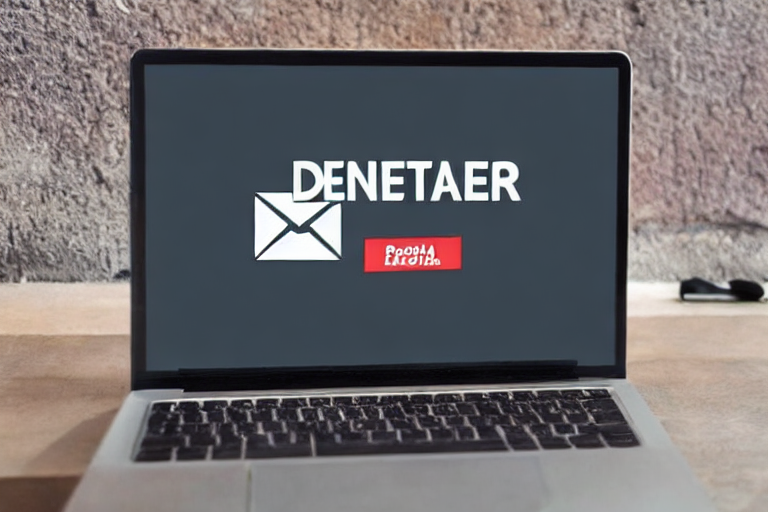

Imagen guardada como 'ciberseguridad_imagen_mejorada.png'


In [ ]:
# Paso 1: Instala las bibliotecas necesarias
!pip install diffusers transformers torch accelerate

# Paso 2: Importa las bibliotecas
from diffusers import StableDiffusionPipeline
import torch
from IPython.display import display  # Para mostrar la imagen en Colab
from PIL import Image  # Para manejar la imagen

# Paso 3: Cargar el modelo de Stable Diffusion
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # Mueve el modelo a la GPU

# Paso 4: Definir el prompt mejorado
prompt = """Una imagen realista y detallada de un correo electrónico de phishing en una pantalla de computadora.
El correo tiene un diseño sospechoso, con un remitente desconocido, un asunto alarmante y un enlace fraudulento.
En el fondo, se ve una oficina moderna con personas trabajando en sus computadoras.
Estilo realista, alta definición, 4K, con colores fríos como azules y grises, y detalles nítidos."""

# Paso 5: Generar la imagen con parámetros optimizados
image = pipe(
    prompt,
    num_inference_steps=50,  # Más pasos para mayor detalle
    guidance_scale=7.5,      # Controla la adherencia al prompt
    height=512,             # Altura de la imagen
    width=768               # Ancho de la imagen (formato panorámico)
).images[0]

# Paso 6: Mostrar la imagen generada en Colab
print("Imagen generada:")
display(image)  # Muestra la imagen directamente en el cuaderno

# Paso 7: Guardar la imagen en Google Colab (opcional)
image.save("ciberseguridad_imagen_mejorada.png")
print("Imagen guardada como 'ciberseguridad_imagen_mejorada.png'")

Segun CANVA el mismo prompt anterior presenta esta imagen:Creo que esta imagen es ampliamente mejor que las anteriores, utilizando la ia desde colab 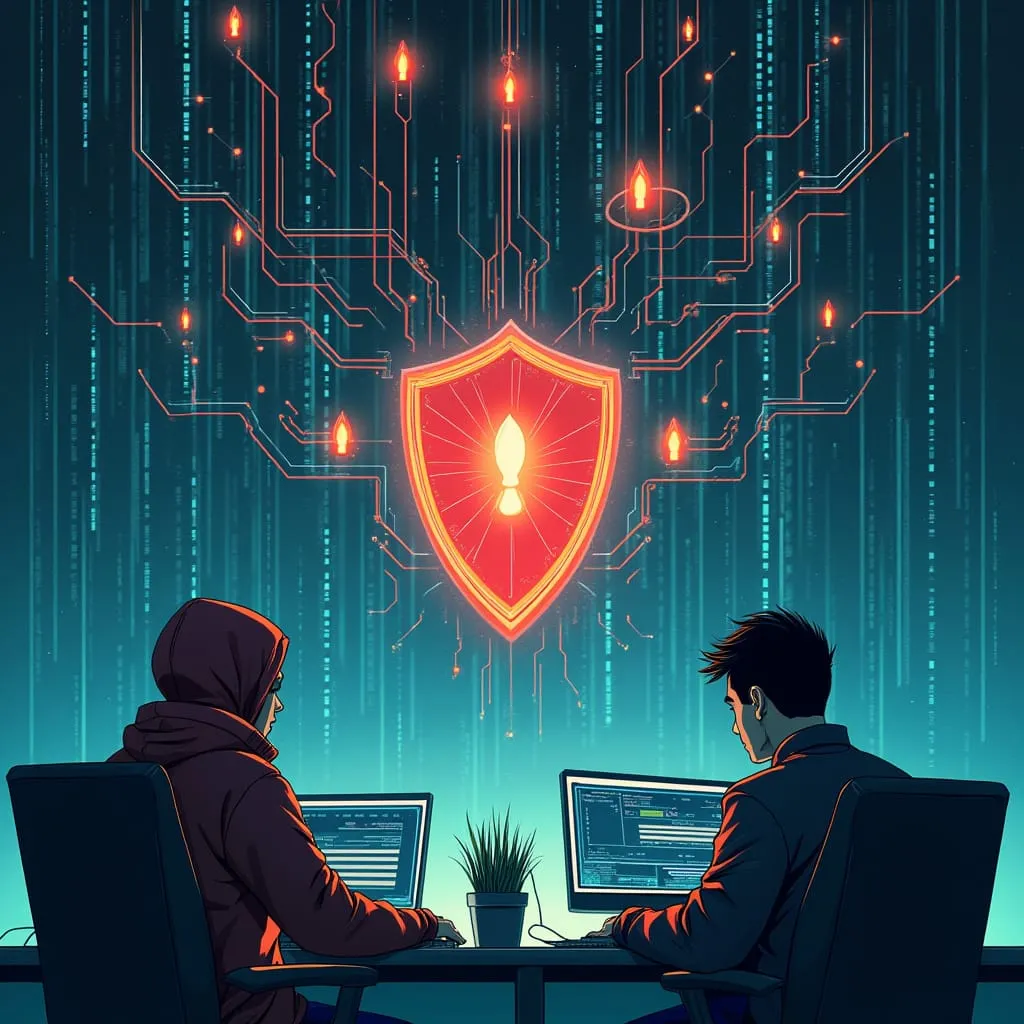

In [ ]:
# Paso 1: Instala las bibliotecas necesarias
!pip install transformers torch

# Paso 2: Importa las bibliotecas
from transformers import pipeline

# Paso 3: Cargar el modelo GPT-2 en español
generator = pipeline("text-generation", model="datificate/gpt2-small-spanish")

# Paso 4: Definir el prompt relacionado con ciberseguridad
prompt = """
Explica en detalle por qué la ciberseguridad es esencial en el mundo digital actual,
mencionando al menos tres razones principales y dando ejemplos concretos de amenazas cibernéticas comunes.
"""

# Paso 5: Generar texto a partir del prompt
output = generator(
    prompt,
    max_length=300,  # Longitud máxima del texto generado
    num_return_sequences=1,  # Número de respuestas generadas
    temperature=0.7,  # Controla la creatividad (0.7 es un buen equilibrio)
    top_p=0.9,  # Filtra las opciones menos probables
)

# Paso 6: Obtener el texto generado
texto_generado = output[0]['generated_text']

# Paso 7: Formatear el texto en párrafos
# Dividir el texto en oraciones (usando el punto como separador)
oraciones = texto_generado.split(". ")

# Unir las oraciones en párrafos de 3-4 oraciones cada uno
parrafos = []
parrafo_actual = ""
for i, oracion in enumerate(oraciones):
    parrafo_actual += oracion + ". "
    if (i + 1) % 3 == 0:  # Cada 3 oraciones, formar un párrafo
        parrafos.append(parrafo_actual.strip())
        parrafo_actual = ""
if parrafo_actual:  # Agregar el último párrafo si queda texto
    parrafos.append(parrafo_actual.strip())

# Paso 8: Mostrar el texto formateado en párrafos
print("Texto generado:\n")
for parrafo in parrafos:
    print(parrafo)
    print()  # Salto de línea entre párrafos

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Texto generado:

Explica en detalle por qué la ciberseguridad es esencial en el mundo digital actual, 
mencionando al menos tres razones principales y dando ejemplos concretos de amenazas cibernéticas comunes.

La primera, la ciberseguridad es un campo de estudio que tiene como objetivo la ciberseguridad, que consiste en medir la probabilidad de un ataque cibernético o de un ataque cibernético a una computadora.

La segunda razón es que es una de las razones que hacen que la ciberseguridad se haya convertido en una ciencia de la computación.

La tercera es que la ciberseguridad es un campo de estudio que tiene como objetivo la ciberseguridad, que consiste en medir la probabilidad de un ataque cibernético o de un ataque cibernético a una computadora.

La ciberseguridad es una rama de la informática que se refiere a la tecnología que utiliza el software, la información, la tecnología de la computación, y las tecnologías de la información, y en el que se aplica la tecnología de la informa

In [ ]:
# Paso 1: Instala las bibliotecas necesarias
!pip install transformers torch

# Paso 2: Importa las bibliotecas
from transformers import pipeline

# Paso 3: Cargar el modelo GPT-2 en español
generator = pipeline("text-generation", model="datificate/gpt2-small-spanish")

# Paso 4: Definir el prompt relacionado con ciberseguridad
prompt = "Explícame cómo escribir una contraseña segura, incluyendo recomendaciones sobre longitud, combinación de caracteres, evitar palabras comunes, y otras prácticas recomendadas"

# Paso 5: Generar texto a partir del prompt
output = generator(
    prompt,
    max_length=300,  # Longitud máxima del texto generado
    num_return_sequences=1,  # Número de respuestas generadas
    temperature=0.7,  # Controla la creatividad (0.7 es un buen equilibrio)
    top_p=0.9,  # Filtra las opciones menos probables
)

# Paso 6: Obtener el texto generado
texto_generado = output[0]['generated_text']

# Paso 7: Formatear el texto en párrafos
# Dividir el texto en oraciones (usando el punto como separador)
oraciones = texto_generado.split(". ")

# Unir las oraciones en párrafos de 3-4 oraciones cada uno
parrafos = []
parrafo_actual = ""
for i, oracion in enumerate(oraciones):
    parrafo_actual += oracion + ". "
    if (i + 1) % 3 == 0:  # Cada 3 oraciones, formar un párrafo
        parrafos.append(parrafo_actual.strip())
        parrafo_actual = ""
if parrafo_actual:  # Agregar el último párrafo si queda texto
    parrafos.append(parrafo_actual.strip())

# Paso 8: Mostrar el texto formateado en párrafos
print("Texto generado:\n")
for parrafo in parrafos:
    print(parrafo)
    print()  # Salto de línea entre párrafos

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Texto generado:

Explícame cómo escribir una contraseña segura, incluyendo recomendaciones sobre longitud, combinación de caracteres, evitar palabras comunes, y otras prácticas recomendadas.

El programa puede ser utilizado para realizar pruebas de seguridad en lugar de los programas que no se han probado, o para la detección de errores en la seguridad. Los programas de seguridad en el programa pueden ser usados por cualquier persona, incluyendo a los usuarios de seguridad.

El programa puede ser usado para probar el programa, los programas que no se han probado, o para la detección de errores en la seguridad.

El programa puede ser usado para probar el programa, los programas que no se han probado, o para la detección de errores en la seguridad.

El programa puede ser utilizado para probar el programa, los programas que no se han probado, o para la detección de errores en la seguridad.

Los programas de seguridad en el programa pueden ser usados para probar el programa, los programas 

# A diferencia de gpt2 -  el modelo de chatgpt actual me devuelve este texto:

Longitud: La contraseña debe tener al menos 12 caracteres. Cuanto más larga, mejor, ya que las contraseñas más largas son más difíciles de adivinar.

Mezcla de caracteres: Utiliza una combinación de letras (mayúsculas y minúsculas), números y símbolos. Esto aumenta la complejidad de la contraseña.

Evita palabras comunes: No uses palabras comunes, nombres o fechas fácilmente asociables, como tu nombre, cumpleaños o palabras que se encuentran en el diccionario.

No repitas caracteres: Evita usar el mismo carácter varias veces de manera consecutiva o patrones fácilmente adivinables como "1234" o "qwerty".

Usa frases de contraseña: En lugar de una palabra única, usa una frase larga con palabras aleatorias o una combinación de palabras que solo tú puedas recordar.

Cambia tus contraseñas regularmente: Si es posible, actualiza tus contraseñas cada 3-6 meses, y nunca uses la misma contraseña en varios sitios.

Autenticación de dos factores (2FA): Siempre que sea posible, activa la autenticación de dos factores para agregar una capa extra de seguridad.